# Minimum Cleaning of tweets
In this notebook, we are minimum cleaning the 
- externally annotated [tweets](https://arxiv.org/abs/2005.12423)
- testing tweets (the tweets we scraped)

to be used in the BERT model. As BERT is a contextual and bi-directional model, we will not be deep cleaning tweets in order for the model to pick up on punctuations and stopwords etc.

Minimum cleaned is described as:
- Keeping stop words
- Not removing punctuation
- No lemmatization/Stemming
- Removing the '#' but keeping the word
- Converting all letters to lowercase

and removal of

- URL's
- user mentions(@), new line characters (\n), 
- changing &amp to 'and'
- more than 1 space
- emojis
- changing contractions like "can't" into "can not"


## 1. Importing libraries

In [239]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords

os.chdir('c:\\Users\\Owner\\Desktop\\Sem4\\Capstone\\Project\\')
os.getcwd()

'c:\\Users\\Owner\\Desktop\\Sem4\\Capstone\\Project'

In [240]:
ann_tweets = pd.read_csv('data/after_eda.csv')
ann_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505106 entries, 0 to 505105
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Datetime      505106 non-null  object
 1   Tweet Id      505106 non-null  int64 
 2   Text          505106 non-null  object
 3   Location      385264 non-null  object
 4   Retweet       505106 non-null  int64 
 5   Like          505106 non-null  int64 
 6   new_Hashtags  505014 non-null  object
dtypes: int64(3), object(4)
memory usage: 27.0+ MB


In [241]:
#ann_tweets.columns=['Tweet ID','label','Text']

In [242]:
ann_tweets.Text

0         @elonmusk i think twitter bird is now free. Bu...
1         @joydeepg9 @Deekay01119442 @TNSubbaRao1 There ...
2         @nytimes Once again the entitled NYT wants to ...
3         #NoWonder #China's #WhiteTerror or #BlueTerror...
4         Hey, what a surprise, 1 year later and nada! #...
                                ...                        
505101    Father returns from overseas wedding after son...
505102    Future unclear for White House Commission on #...
505103    Happy New year to my fav #Aapi on #Twitter @Ar...
505104    NY Times called out for misstep in Asian cultu...
505105    How an #Asian American woman fought for her ci...
Name: Text, Length: 505106, dtype: object

In [243]:
#cat= { 2: 'negative', 1: 'positive',0:'neutral'}
#ann_tweets['Category']=ann_tweets['label'].map(cat)


In [244]:
#ax = sns.countplot(x="label", data=ann_tweets)

#plt.show()

## 2. Removing URLS

In [245]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


In [246]:
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : remove_URL(x))

In [247]:
ann_tweets['Text'][34]

"@ChinaSpox_India @UnderSecStateJ #Tibet is never part of #China, that's why \n#CCP deeply fear of Tibetan cause &amp; changing our place &amp; call them #Xizang, as China spreading #ChineseVirus &amp; Tibetan spreading messages of LOVE &amp; compassion, thats why millions are supporting #FreeTibet\n #UN #US"

## 3. Removing usermentions, newline character(\n) and &amp

In [248]:
def remove_user_hashtags(text):
    url = re.compile(r'@\w+')
    return url.sub(r'',text)

def remove_amp(text):
    return text.replace(r'&amp', 'and')

def remove_n(text):
    return text.replace('\n', '')

In [249]:
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : remove_user_hashtags(x))
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : remove_n(x))
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : remove_amp(x))

In [250]:
ann_tweets['Text'][34]

"  #Tibet is never part of #China, that's why #CCP deeply fear of Tibetan cause and; changing our place and; call them #Xizang, as China spreading #ChineseVirus and; Tibetan spreading messages of LOVE and; compassion, thats why millions are supporting #FreeTibet #UN #US"

## 4. Converting contractions can't -> can not

In [251]:
def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    return phrase

In [252]:
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : decontracted(x))

In [253]:
ann_tweets['Text'][34]

'  #Tibet is never part of #China, that is why #CCP deeply fear of Tibetan cause and; changing our place and; call them #Xizang, as China spreading #ChineseVirus and; Tibetan spreading messages of LOVE and; compassion, thats why millions are supporting #FreeTibet #UN #US'

## 5. Removing more than 1 spacee

In [254]:
def clean(text):
    text = re.sub('\s{2,}', ' ', text)
    return text

In [255]:
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : clean(x))

In [256]:
ann_tweets['Text'][34]

' #Tibet is never part of #China, that is why #CCP deeply fear of Tibetan cause and; changing our place and; call them #Xizang, as China spreading #ChineseVirus and; Tibetan spreading messages of LOVE and; compassion, thats why millions are supporting #FreeTibet #UN #US'

## 6. Removing emojis

In [257]:
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", text)

In [258]:
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : strip_emoji(x))

C:\Users\Owner\AppData\Local\Temp/ipykernel_7056/2482492037.py:2: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"", text)


In [259]:
ann_tweets['Text'][34]

' #Tibet is never part of #China, that is why #CCP deeply fear of Tibetan cause and; changing our place and; call them #Xizang, as China spreading #ChineseVirus and; Tibetan spreading messages of LOVE and; compassion, thats why millions are supporting #FreeTibet #UN #US'

## 7. Removing hash (#) symbol

In [260]:
def clean_hashtags(tweet):
    clean = re.compile(r'[#]')
    return clean.sub(r'',tweet)

In [261]:
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : clean_hashtags(x))

In [262]:
ann_tweets['Text'][34]

' Tibet is never part of China, that is why CCP deeply fear of Tibetan cause and; changing our place and; call them Xizang, as China spreading ChineseVirus and; Tibetan spreading messages of LOVE and; compassion, thats why millions are supporting FreeTibet UN US'

## 8. Converting to lowercase

In [263]:
ann_tweets['Text']=ann_tweets['Text'].apply(lambda x : x.lower())

In [264]:
ann_tweets['Text'][34]

' tibet is never part of china, that is why ccp deeply fear of tibetan cause and; changing our place and; call them xizang, as china spreading chinesevirus and; tibetan spreading messages of love and; compassion, thats why millions are supporting freetibet un us'

## 9. Saving to .csv

In [265]:
#ann_tweets.to_csv('data//minimum_cleaned_tweets_test.csv', index=False)

## 10. Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for val in ann_tweets.Text:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## 10. Tweet Length

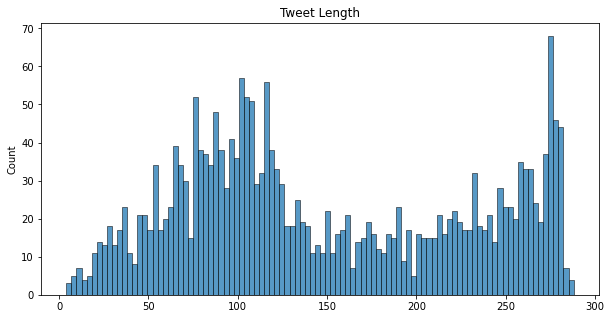

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in ann_tweets.Text], bins=100)
plt.title('Tweet Length')
plt.show()

In [31]:
max_len = max([len(sent) for sent in ann_tweets.Text])
print('Max length: ', max_len)

Max length:  288
